# Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

# Loading the datasets

In [2]:
df = pd.read_csv("99aana.csv")
df.head()

,title,price,area,location,district,floor,room,bedroom,bathroom,livingroom,kitchen,parking,link
0,"House for Sale at Sitapaila, Kathmandu","25,000,000",sq m0-5-0-0,"Sitapaila, Kathmandu",Kathmandu,3,12,NaN,3,NaN,NaN,1.0,https://99aana.com/property/house-for-sale-at-...
1,"House for sale at Lubhu, Lalitpur","14,500,000",sq m0-3-0-0,"Lubhu, Lalitpur",Lalitpur,2.5,7,4,3,NaN,2,1.0,https://99aana.com/property/house-for-sale-at-...
2,"House for sale at Gothatar, Kathmandu","24,400,000",sq m0-4-0-0,"Gothatar, Kathmandu",Kathmandu,2.5,NaN,NaN,NaN,NaN,NaN,1.0,https://99aana.com/property/house-for-sale-at-...
3,"House for sale at TiKathali, Lalitpur","12,500,000",sq m0-3-0-0,"TiKathali, Lalitpur",Lalitpur,1.5,NaN,NaN,NaN,NaN,NaN,1.0,https://99aana.com/property/house-for-sale-at-...
4,"House for Sale at Kadaghari, Kathmandu","13,100,000",sq m0-3-0-0,"Kadaghari, Kathmandu",Kathmandu,2.5,NaN,NaN,NaN,NaN,NaN,1.0,https://99aana.com/property/house-for-sale-at-...


In [3]:
df.shape

(2063, 13)

# Data cleaning

In [4]:
# remove sq m
df['area'] = df['area'].apply(lambda x: x.split('sq m')[1])
df.head()

# Controls the max num. of rows displayed when printring a dataframe
pd.set_option('display.max_rows', None)

In [5]:
# dhur/dhir paisa kattha haat aana daam. This function deals with dashed value e.g 1-2-3-4
# 1st deals with ropani-aana-paisa-dam
def clean_dashedArea(dashedArea):
    # area in sq feet
    area = 0
    if dashedArea.count('-') == 2:
        return None
    if dashedArea.count('-') == 3:
        splitted_area = dashedArea.split('-')
        # converting the splitted value into integer
        for i in range (0, len(splitted_area)):
            splitted_area[i] = float(splitted_area[i])
        area = area + 5476 * splitted_area[0] # ropani to sq.ft.
        area = area + 342.25 * splitted_area[1] # aana to sq.ft.
        area = area + 85.56 * splitted_area[2] # paisa to sq.ft.
        area = area + 21.39 * splitted_area[3] # dam to sq.ft.
        area = round(area, 2)
        return str(area)
    else:
        return dashedArea
df['area'] = df['area'].apply(clean_dashedArea)
df.dropna(subset=['area'], inplace = True)

In [6]:
# clean katha and dhur. This deals with worded values
def clean_katha_and_dhur(values):
    area = 0 # in sq. ft.
    if values == None:
        return values
    # conversion to lowercase to make it convinient if a substring exists in a string.
    # Cleaned spelling mistakes with vscode
    values = values.lower()

    # 1 Katha is equal to 3645 sq ft.
    # 1 Dhur is equal to 182.25 sq ft.
    if 'katha' in values and 'dhur' in values:
        katha = float(values.split('katha')[0].strip())
        dhur = float(values.split('katha')[1].split('dhur')[0].strip())
        area = area + katha * 3645
        area = area + dhur * 182.25
        area = round(area, 2)
        return str(area)
    
    if 'katha' in values:
        katha = float(values.split('katha')[0])
        area = area + 3645 * katha
        area = round(area, 2)
        return str(area)

    if 'dhur' in values:
        dhur = float(values.split('dhur')[0])
        area = area + dhur * 182.25
        area = round(area, 2)
        return str(area)
    return values
    
df['area'] = df['area'].apply(clean_katha_and_dhur)

In [7]:
# clean ropani aana paisa dam
# 1 Ropani = 5476 sq. ft.
# 1 Aana = 342.25 sq. ft.
# 1 Paisa = 85.56 sq. ft.
# 1 Dam = 21.39 sq. ft.
# All data containing dam was removed due to easier data cleaning. Now only dealing with aana and paisa
def clean_RAPD(values):
    area = 0 # sq. ft.
    values = values.lower()
    if 'aana' in values and 'paisa' in values:
        aana = float(values.split('aana')[0].strip())
        paisa = float(values.split('aana')[1].split('paisa')[0].strip())
        area = area + aana * 342.25
        area = area + paisa * 85.56
        area = round(area, 2)
        return str(area)
    if 'aana' in values:
        aana = float(values.split('aana')[0].strip())
        area = area + aana + 342.25
        area = round(area, 2)
        return str(area)
    return values
    # paisa does not come on its own so we dont need to write code for only paisa data edge case

df['area'] = df['area'].apply(clean_RAPD)

In [8]:
def clean_price(price):
    # rs. and negotiable removed and removed commas and convert into integer
    price = price.lower()
    price = price.replace(',', '')
    price = price.replace('rs', '')
    
    crore = 0
    lakh = 0
    total = 0     
    # initializing a variable to convert price into words into integer
    if 'crore' not in price and 'lakh' not in price:
        try:
            price = int(price)
        except:
            price = None
    else: 
        if 'crore' in price and 'lakh' in price: # like 2 crore 45 lakh
            crore = int(price.split('crore')[0])
            lakh = int(price.split('crore')[1].split('lakh')[0])
        elif 'lakh' in price and 'crore' not in price: # like 50 lakh
            lakh =  int(price.split('lakh')[0])
        elif 'crore' in price and 'lakh' not in price: # like 5 crore
            crore = int(price.split('crore')[0])
        total = crore * 10000000 + lakh * 100000
        return total
    
    return price

df['price'] = df['price'].apply(clean_price)

In [9]:
df.head()

,title,price,area,location,district,floor,room,bedroom,bathroom,livingroom,kitchen,parking,link
0,"House for Sale at Sitapaila, Kathmandu",25000000.0,1711.25,"Sitapaila, Kathmandu",Kathmandu,3,12,NaN,3,NaN,NaN,1.0,https://99aana.com/property/house-for-sale-at-...
1,"House for sale at Lubhu, Lalitpur",14500000.0,1026.75,"Lubhu, Lalitpur",Lalitpur,2.5,7,4,3,NaN,2,1.0,https://99aana.com/property/house-for-sale-at-...
2,"House for sale at Gothatar, Kathmandu",24400000.0,1369.0,"Gothatar, Kathmandu",Kathmandu,2.5,NaN,NaN,NaN,NaN,NaN,1.0,https://99aana.com/property/house-for-sale-at-...
3,"House for sale at TiKathali, Lalitpur",12500000.0,1026.75,"TiKathali, Lalitpur",Lalitpur,1.5,NaN,NaN,NaN,NaN,NaN,1.0,https://99aana.com/property/house-for-sale-at-...
4,"House for Sale at Kadaghari, Kathmandu",13100000.0,1026.75,"Kadaghari, Kathmandu",Kathmandu,2.5,NaN,NaN,NaN,NaN,NaN,1.0,https://99aana.com/property/house-for-sale-at-...


In [10]:
df['area'] = df['area'].apply(lambda x: float(x))

In [11]:
df['livingroom'] = pd.to_numeric(df['livingroom'])

In [12]:
df['livingroom'] = df['livingroom'].fillna(0)

In [13]:
df['livingroom'] = df['livingroom'].astype('int64')

In [14]:
df.tail()

,title,price,area,location,district,floor,room,bedroom,bathroom,livingroom,kitchen,parking,link
2058,"House for sale at Golfutar, Kathmandu",29500000.0,346.25,"Golfutar,Kathmandu","Golfutar,Kathmandu",3.5,14,5,5,0,NaN,NaN,https://99aana.com/property/house-at-golfutar-17/
2059,"House for sale at Boudhha, Kathmandu",25000000.0,345.25,"Boudhha, Kathmandu",Kathmandu,3.5,12,3,3,0,NaN,NaN,https://99aana.com/property/house-for-sale-at-...
2060,"House for sale at Budhanilkantha, Kathmandu",20000000.0,345.25,Budhanilkantha,Budhanilkantha,1,5,2,1,0,NaN,NaN,https://99aana.com/property/house-at-budhanilk...
2061,"House for sale at Boudhha, Kathmandu",150000000.0,4877.06,"Bouddha,Kathmandu","Bouddha,Kathmandu",3,40,11,12,0,NaN,NaN,https://99aana.com/property/house-for-sale-at-...
2062,"House for sale at Sukedhara, Kathmandu",43500000.0,351.25,"Sukedhara, Kathmandu",Kathmandu,3.5,NaN,NaN,NaN,0,NaN,NaN,https://99aana.com/property/house-for-sale-at-...


In [15]:
df.isnull().sum()

title           0
price           3
area            0
location        0
district        0
floor           0
room          246
bedroom       641
bathroom      296
livingroom      0
kitchen       966
parking       450
link            0
dtype: int64

In [16]:
df['kitchen'] = pd.to_numeric(df['kitchen'], errors='coerce')
df['floor'] = pd.to_numeric(df['floor'], errors='coerce')
df['room'] = pd.to_numeric(df['room'], errors='coerce')
df['bedroom'] = pd.to_numeric(df['bedroom'], errors='coerce')
df['bathroom'] = pd.to_numeric(df['bathroom'], errors='coerce')

In [17]:
# Dropping rows with empty rooms and price
df.dropna(axis=0, subset=['price'], inplace=True)
df.dropna(axis=0, subset=['room'], inplace=True)
df.dropna(axis=0, subset=['floor'], inplace=True)

In [18]:
df.head()

,title,price,area,location,district,floor,room,bedroom,bathroom,livingroom,kitchen,parking,link
0,"House for Sale at Sitapaila, Kathmandu",25000000.0,1711.25,"Sitapaila, Kathmandu",Kathmandu,3.0,12.0,NaN,3.0,0,NaN,1.0,https://99aana.com/property/house-for-sale-at-...
1,"House for sale at Lubhu, Lalitpur",14500000.0,1026.75,"Lubhu, Lalitpur",Lalitpur,2.5,7.0,4.0,3.0,0,2.0,1.0,https://99aana.com/property/house-for-sale-at-...
6,"House for sale at Budhanilkantha, Kathmandu",23500000.0,1369.00,"Budhanilkantha, Kathmandu",Kathmandu,2.5,8.0,NaN,3.0,0,NaN,1.0,https://99aana.com/property/house-for-sale-at-...
7,"House for Sale at Budhanilkantha, Kathmandu",21000000.0,1026.75,"Budhanilkantha, Kathmandu",Kathmandu,2.5,8.0,NaN,3.0,0,NaN,1.0,https://99aana.com/property/house-for-sale-at-...
8,"House for sale at Thankot, Chandragiri, Kathmandu",16500000.0,1026.75,"Thankot, Chandragiri, Kathmandu",Kathmandu,2.5,7.0,NaN,3.0,0,NaN,1.0,https://99aana.com/property/house-for-sale-at-...


In [19]:
# Removing outliers
df = df[df['room'] < 17]

# Calcuate price per sq. ft.
df['pp_sqft'] = df['price'] / df['area']
df['pp_sqft'].head(10)

0     14609.203798
1     14122.230338
6     17165.814463
7     20452.885318
8     16070.124178
10    18018.018018
11    14122.230338
12    13148.283419
13    21548.575603
14      329.218107
Name: pp_sqft, dtype: float64

<Axes: xlabel='area', ylabel='price'>

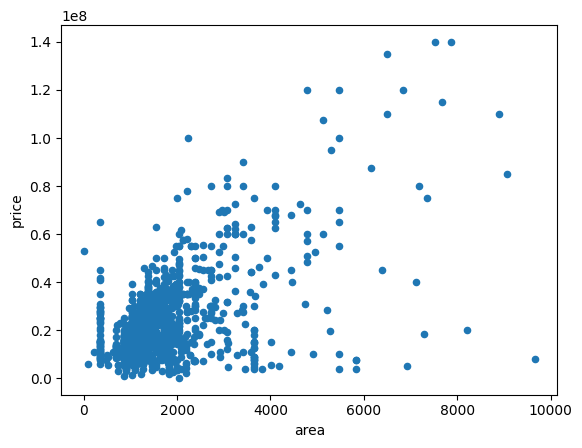

In [20]:
df1 = df[(df['price'] < 150000000) & (df['area'] < 10000)]

X = df1['area']
Y = df1['price']

df1.plot.scatter(x='area', y='price')

<Axes: xlabel='room', ylabel='price'>

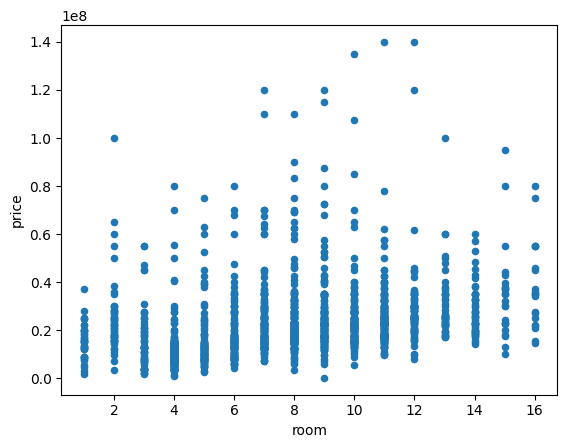

In [21]:
df1.plot.scatter(x="room", y="price")

In [22]:
len(df1.location.unique())

939

In [23]:
df2 = df1.copy()
# remove extra spaces and comma
df2.location = df2.location.apply(lambda x : x.replace(',', '').strip())
location_stats = df2.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Imadol Lalitpur                                              71
TiKathali Lalitpur                                           51
Kadaghari Kathmandu                                          36
Kapan Kathmandu                                              32
Sitapaila Kathmandu                                          26
Budhanilkantha Kathmandu                                     25
Imadol Mahalaxmi Lalitpur                                    22
Lubhu Lalitpur                                               21
Kalanki Kathmandu                                            19
Pepsicola Kathmandu                                          18
Bharatpur Chitwan                                            13
Suryabinayak Bhaktapur                                       13
Itahari Sunsari                                              12
Jarankhu Kathmandu                                           12
Duwakot Bhaktapur                                            12
Kapan Budhanilkantha Kathmandu 

In [24]:
len(location_stats[location_stats <=10])

913

In [25]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Bhangal Budhanilkantha Kathmandu                             10
Mulpani Kathmandu                                            10
Dhapasi Kathmandu                                             9
Bhangal Kathmandu                                             9
Mandikhatar Kathmandu                                         8
Makalbari Jorpati Kathmandu                                   8
Biratnagar Morang                                             8
Golfutar Kathmandu                                            7
Hattiban Lalitpur                                             7
Bansbari Kathmandu                                            7
Pokhara Kaski                                                 7
Tokha Kathmandu                                               7
Gokarna Kathmandu                                             7
Thankot Kathmandu                                             7
Basundhara Kathmandu                                          7
Goldhunga Kathmandu            

In [26]:
len(df2.location.unique())

932

In [27]:
df2.location = df2.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df2.location.unique())

20

In [28]:
df2.head()

,title,price,area,location,district,floor,room,bedroom,bathroom,livingroom,kitchen,parking,link,pp_sqft
0,"House for Sale at Sitapaila, Kathmandu",25000000.0,1711.25,Sitapaila Kathmandu,Kathmandu,3.0,12.0,NaN,3.0,0,NaN,1.0,https://99aana.com/property/house-for-sale-at-...,14609.203798
1,"House for sale at Lubhu, Lalitpur",14500000.0,1026.75,Lubhu Lalitpur,Lalitpur,2.5,7.0,4.0,3.0,0,2.0,1.0,https://99aana.com/property/house-for-sale-at-...,14122.230338
6,"House for sale at Budhanilkantha, Kathmandu",23500000.0,1369.00,Budhanilkantha Kathmandu,Kathmandu,2.5,8.0,NaN,3.0,0,NaN,1.0,https://99aana.com/property/house-for-sale-at-...,17165.814463
7,"House for Sale at Budhanilkantha, Kathmandu",21000000.0,1026.75,Budhanilkantha Kathmandu,Kathmandu,2.5,8.0,NaN,3.0,0,NaN,1.0,https://99aana.com/property/house-for-sale-at-...,20452.885318
8,"House for sale at Thankot, Chandragiri, Kathmandu",16500000.0,1026.75,other,Kathmandu,2.5,7.0,NaN,3.0,0,NaN,1.0,https://99aana.com/property/house-for-sale-at-...,16070.124178


In [29]:
df3 = df2.copy()
df4 = df3.drop(['title', 'district', 'bedroom', 'bathroom', 'livingroom', 'kitchen', 'parking', 'link', 'pp_sqft'], axis='columns')
df4.head()

,price,area,location,floor,room
0,25000000.0,1711.25,Sitapaila Kathmandu,3.0,12.0
1,14500000.0,1026.75,Lubhu Lalitpur,2.5,7.0
6,23500000.0,1369.00,Budhanilkantha Kathmandu,2.5,8.0
7,21000000.0,1026.75,Budhanilkantha Kathmandu,2.5,8.0
8,16500000.0,1026.75,other,2.5,7.0


In [30]:
dummies = pd.get_dummies(df4.location)
dummies.head()

,Balkot Bhaktapur,Bhaisepati Lalitpur,Bharatpur Chitwan,Budhanilkantha Kathmandu,Duwakot Bhaktapur,Gothatar Kathmandu,Imadol Lalitpur,Imadol Mahalaxmi Lalitpur,Itahari Sunsari,Jarankhu Kathmandu,Kadaghari Kathmandu,Kalanki Kathmandu,Kapan Budhanilkantha Kathmandu,Kapan Kathmandu,Lubhu Lalitpur,Pepsicola Kathmandu,Sitapaila Kathmandu,Suryabinayak Bhaktapur,TiKathali Lalitpur,other
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
6,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [31]:
df5 = pd.concat([df4, dummies.drop('other', axis='columns')], axis='columns')
df5.head()

,price,area,location,floor,room,Balkot Bhaktapur,Bhaisepati Lalitpur,Bharatpur Chitwan,Budhanilkantha Kathmandu,Duwakot Bhaktapur,...,Jarankhu Kathmandu,Kadaghari Kathmandu,Kalanki Kathmandu,Kapan Budhanilkantha Kathmandu,Kapan Kathmandu,Lubhu Lalitpur,Pepsicola Kathmandu,Sitapaila Kathmandu,Suryabinayak Bhaktapur,TiKathali Lalitpur
0,25000000.0,1711.25,Sitapaila Kathmandu,3.0,12.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,14500000.0,1026.75,Lubhu Lalitpur,2.5,7.0,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
6,23500000.0,1369.00,Budhanilkantha Kathmandu,2.5,8.0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
7,21000000.0,1026.75,Budhanilkantha Kathmandu,2.5,8.0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
8,16500000.0,1026.75,other,2.5,7.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
df6 = df5.drop('location', axis='columns')
df6.head()

,price,area,floor,room,Balkot Bhaktapur,Bhaisepati Lalitpur,Bharatpur Chitwan,Budhanilkantha Kathmandu,Duwakot Bhaktapur,Gothatar Kathmandu,...,Jarankhu Kathmandu,Kadaghari Kathmandu,Kalanki Kathmandu,Kapan Budhanilkantha Kathmandu,Kapan Kathmandu,Lubhu Lalitpur,Pepsicola Kathmandu,Sitapaila Kathmandu,Suryabinayak Bhaktapur,TiKathali Lalitpur
0,25000000.0,1711.25,3.0,12.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,14500000.0,1026.75,2.5,7.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
6,23500000.0,1369.00,2.5,8.0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7,21000000.0,1026.75,2.5,8.0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
8,16500000.0,1026.75,2.5,7.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
df6.shape

(1720, 23)

# Train test split

In [34]:
X = df6.drop('price', axis='columns')
X.head()

,area,floor,room,Balkot Bhaktapur,Bhaisepati Lalitpur,Bharatpur Chitwan,Budhanilkantha Kathmandu,Duwakot Bhaktapur,Gothatar Kathmandu,Imadol Lalitpur,...,Jarankhu Kathmandu,Kadaghari Kathmandu,Kalanki Kathmandu,Kapan Budhanilkantha Kathmandu,Kapan Kathmandu,Lubhu Lalitpur,Pepsicola Kathmandu,Sitapaila Kathmandu,Suryabinayak Bhaktapur,TiKathali Lalitpur
0,1711.25,3.0,12.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,1026.75,2.5,7.0,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
6,1369.00,2.5,8.0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,1026.75,2.5,8.0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,1026.75,2.5,7.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
Y = df6.price
Y.head()

0    25000000.0
1    14500000.0
6    23500000.0
7    21000000.0
8    16500000.0
Name: price, dtype: float64

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

X_test.head(10)

,area,floor,room,Balkot Bhaktapur,Bhaisepati Lalitpur,Bharatpur Chitwan,Budhanilkantha Kathmandu,Duwakot Bhaktapur,Gothatar Kathmandu,Imadol Lalitpur,...,Jarankhu Kathmandu,Kadaghari Kathmandu,Kalanki Kathmandu,Kapan Budhanilkantha Kathmandu,Kapan Kathmandu,Lubhu Lalitpur,Pepsicola Kathmandu,Sitapaila Kathmandu,Suryabinayak Bhaktapur,TiKathali Lalitpur
1683,1005.35,2.5,9.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
742,684.50,3.5,7.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1441,1026.75,2.5,8.0,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1673,2973.29,3.0,7.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1043,1549.12,1.0,6.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
443,1197.87,1.5,5.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
281,1369.00,2.5,8.0,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
812,1625.68,2.5,8.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536,911.25,1.0,4.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
433,4009.50,1.0,3.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Training and predicting

In [37]:
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# from sklearn.neighbors import KNeighborsRegressor
# lr_clf = LinearRegression()
# dt_clf = DecisionTreeRegressor()
rf_clf = RandomForestRegressor()
# kn_clf = KNeighborsRegressor()

In [38]:
# lr_clf.fit(X_train, Y_train)
# dt_clf.fit(X_train, Y_train)
rf_clf.fit(X_train, Y_train)
# kn_clf.fit(X_train, Y_train)

RandomForestRegressor()

In [39]:
# print(f"Linear Regression Score: {lr_clf.score(X_test, Y_test)} ")
# print(f"Decision Tree Regression Score: {dt_clf.score(X_test, Y_test)} ")
print(f"Random Forest Regression Score: {rf_clf.score(X_test, Y_test)} ")
# print(f"K-Neighbors Regression Score: {kn_clf.score(X_test, Y_test)} ")

Random Forest Regression Score: 0.555431915028697 


## Using ShuffleSplit & Cross Val Score

In [40]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
scores = cross_val_score(RandomForestRegressor(), X, Y, scoring='neg_mean_squared_error', cv=cv)

## Predicting Price Function

In [41]:
def predict_price(location, area, floor, room):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = area
    x[1] = floor
    x[2] = room

    if loc_index >= 0:
        x[loc_index] = 1
        
    # algos = {
    #     "Linear Regression" : lr_clf.predict([x])[0],
    #     "Decision Tree Regression" : dt_clf.predict([x])[0],
    #     "K-Neighbors Regression" : kn_clf.predict([x])[0],
    #     "Random Forest" : rf_clf.predict([x])[0],
        
    # }
    return rf_clf.predict([x])[0]

In [52]:
df6.head(10)

,price,area,floor,room,Balkot Bhaktapur,Bhaisepati Lalitpur,Bharatpur Chitwan,Budhanilkantha Kathmandu,Duwakot Bhaktapur,Gothatar Kathmandu,...,Jarankhu Kathmandu,Kadaghari Kathmandu,Kalanki Kathmandu,Kapan Budhanilkantha Kathmandu,Kapan Kathmandu,Lubhu Lalitpur,Pepsicola Kathmandu,Sitapaila Kathmandu,Suryabinayak Bhaktapur,TiKathali Lalitpur
0,25000000.0,1711.25,3.0,12.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,14500000.0,1026.75,2.5,7.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
6,23500000.0,1369.00,2.5,8.0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7,21000000.0,1026.75,2.5,8.0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
8,16500000.0,1026.75,2.5,7.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,18500000.0,1026.75,2.0,10.0,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
11,14500000.0,1026.75,2.5,7.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
12,13500000.0,1026.75,1.0,4.0,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
13,29500000.0,1369.00,2.5,8.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15,23500000.0,1369.00,3.0,11.0,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [53]:
output = predict_price('Sitapaila Kathmandu', 1711.25, 3.0, 12.0)
output

C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(27335055.555555552)

## Evaluating the model

In [44]:
rmse_scores = np.sqrt(-scores)
rmse_scores

array([10929416.83013686,  9464017.2791887 ,  9149790.83131366,
        9171094.88374011,  9465830.90804165])

## Plotting all models in graph -Todo Later

In [47]:
# import pickle
# with open('real_estate_price_prediction.pickle', 'wb') as f:
#     pickle.dump(rf_clf, f)

In [51]:
# import json
# columns = {
#     'data_columns' : [col.lower() for col in X.columns]
# }
# with open('columns.json', 'w') as f:
#     f.write(json.dumps(columns))